<h4><b>Here, I used the Principal Component Analysis -PCA tool for the Classification</b></h4>

In [ ]:
# I imorted the necessary Python modules
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# load data 
df = pd.read_csv("car_purchasing.csv")
df = df.drop_duplicates()

In [9]:
df

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,41,87384.60,97729.16,837.79,185951.55,185951.55,6995.902524,541670.1016,48901.44342
496,38,123105.00,38790.92,23865.00,185760.92,185760.92,12301.456790,360419.0988,31491.41457
497,54,185724.50,0.00,0.00,185724.50,185724.50,10611.606860,764531.3203,64147.28888
498,59,185724.50,0.00,0.00,185724.50,185724.50,14013.034510,337826.6382,45442.15353


Explained variance ratio with 7 components, by each component:
[3.02812693e-01 2.15530237e-01 1.30461856e-01 1.26300377e-01
 1.15908387e-01 1.08986450e-01 7.34741155e-17]

Explained variance ratio with 7 components, total result:
1.0

Mean Squared Error (MSE) between original and reconstructed data:
7.392823783386014e-31


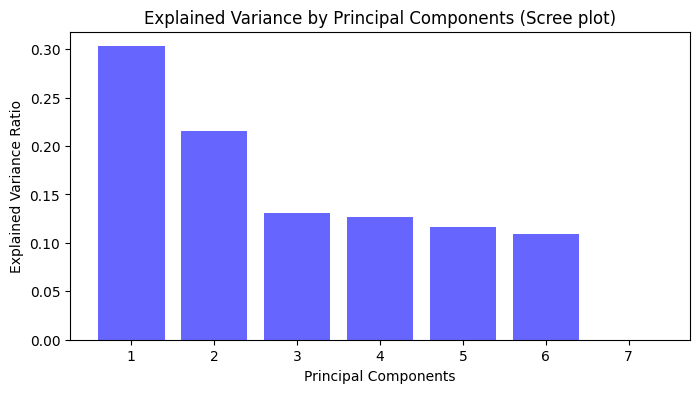

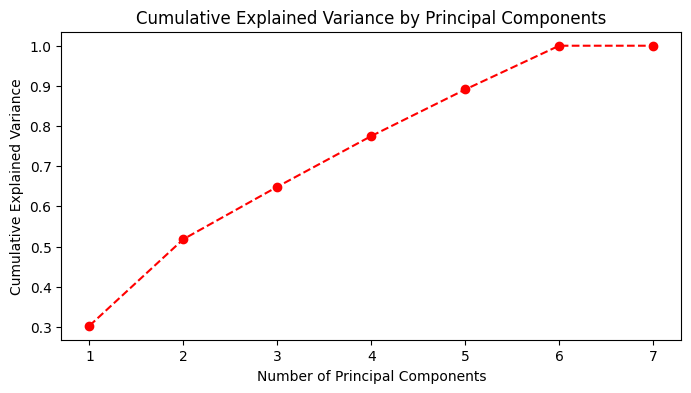

In [10]:
# X/y -split and scale the values
X = df.drop("car_purchase_amount", axis=1)
y = df['car_purchase_amount']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define amount of PCA-variables => principal components
num_components = 7

# train the PCA -model
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# some basic metrics
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio with {num_components} components, by each component:\n{explained_variance_ratio}")

print(f"\nExplained variance ratio with {num_components} components, total result:\n{sum(explained_variance_ratio)}")

# ~~ 100% of data is preserved, which means 
# aim to have less than 10% lost, or even less than 5% lost
# And in this case nothing was lost in the process

X_reconstructed = pca.inverse_transform(X_pca)

# other metric is MSE => keep this as close to 0 as possible
# basically measures how much error the PCA model makes compared to original data
mse = mean_squared_error(X_scaled, X_reconstructed)
print(f"\nMean Squared Error (MSE) between original and reconstructed data:\n{mse}")


# plot variance plots to see how much different components add to explainability
# plot 1: SCREE PLOT
plt.figure(figsize=(8, 4))
plt.bar(range(1, num_components + 1, ), explained_variance_ratio, alpha=0.6, color="b")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components (Scree plot)")
plt.show()

# plot 2: cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_components + 1, ), cumulative_variance, marker="o", linestyle='--', color="r")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.show()

In [11]:
# get the component loadings
loadings = pca.components_

# create a DataFrame
loadings_df = pd.DataFrame(
    loadings.T,
    columns=[f"PC{i + 1}" for i in range(loadings.shape[0])], index=X.columns
)

In [12]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
age,0.031860,0.054639,0.175739,0.890462,-0.399888,-0.110830,2.307344e-17
BasePay,0.014724,0.738873,0.055558,-0.073431,0.028552,-0.236407,6.029004e-01
OvertimePay,0.155574,-0.621382,-0.023121,0.020764,0.115562,-0.548421,5.067611e-01
OtherPay,0.438157,-0.160710,-0.068237,0.022918,-0.167119,0.725645,4.561846e-01
TotalPay,0.622226,0.123887,-0.020228,-0.050399,-0.000997,-0.193464,-5.112706e-02
TotalPayBenefits,0.622226,0.123887,-0.020228,-0.050399,-0.000997,-0.193464,-4.110790e-01
credit_card_debt,0.089184,-0.014301,0.715685,0.169188,0.653346,0.155407,-5.551115e-17
net_worth,0.017299,0.090765,-0.669190,0.408687,0.609203,0.074123,-5.551115e-17


<Axes: >

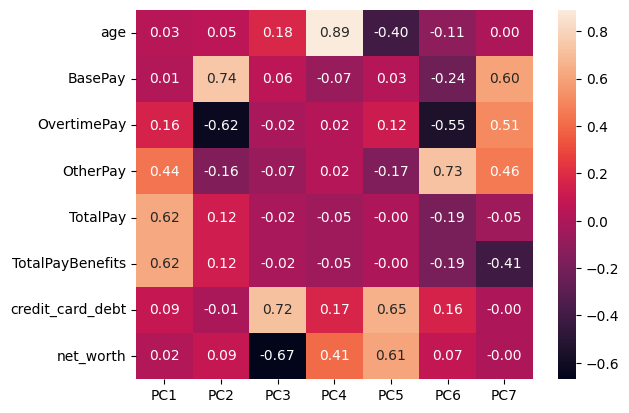

In [13]:
sns.heatmap(loadings_df, annot=True, fmt=".2f")

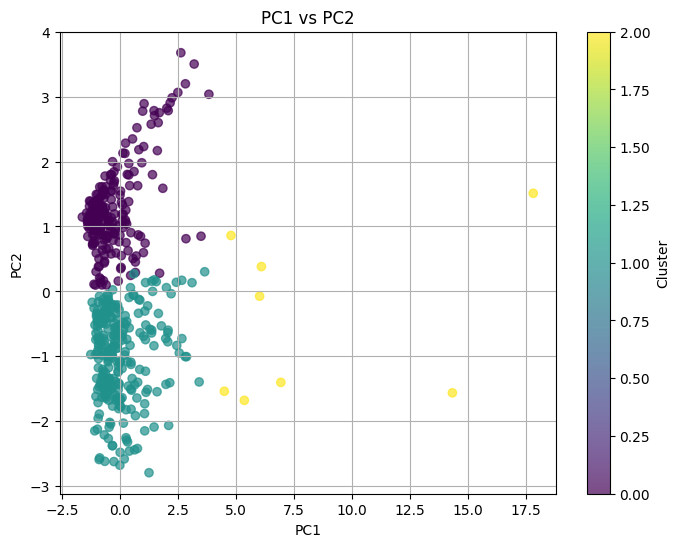

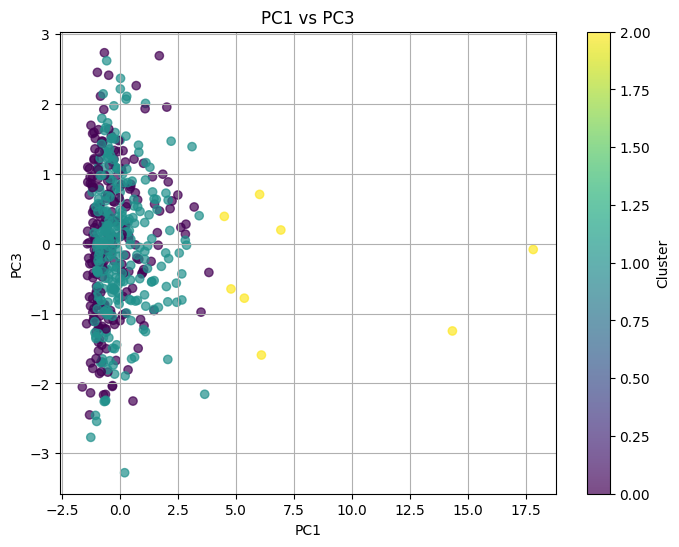

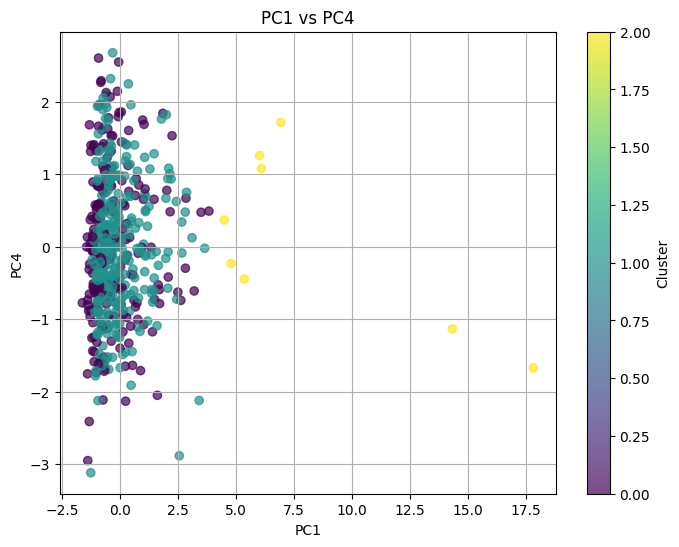

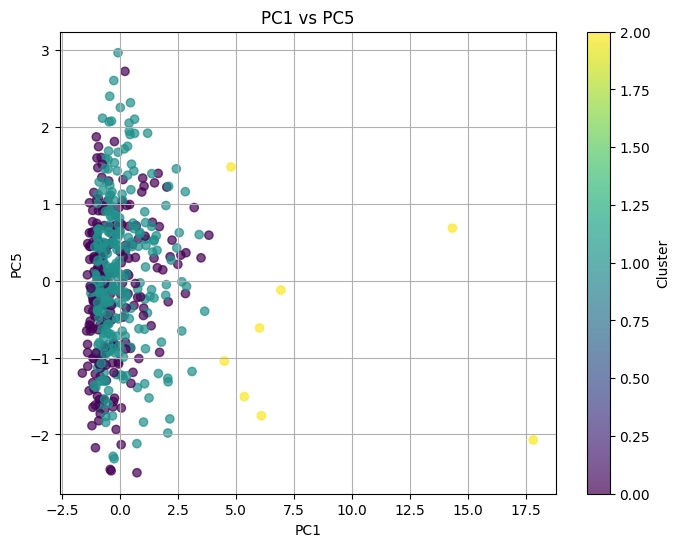

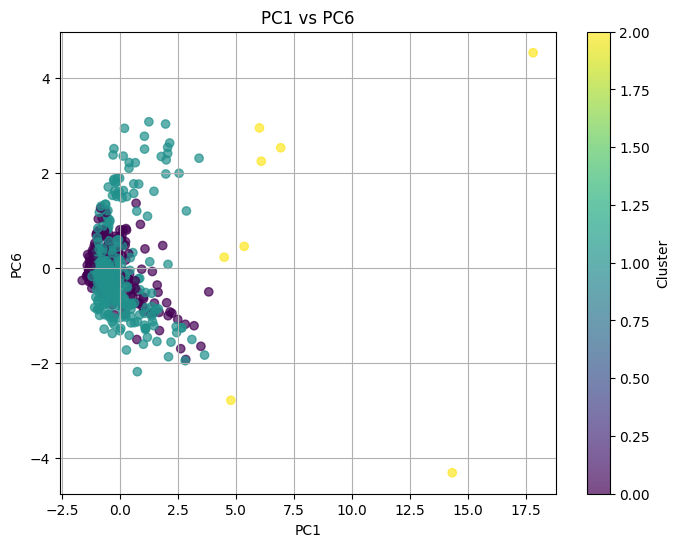

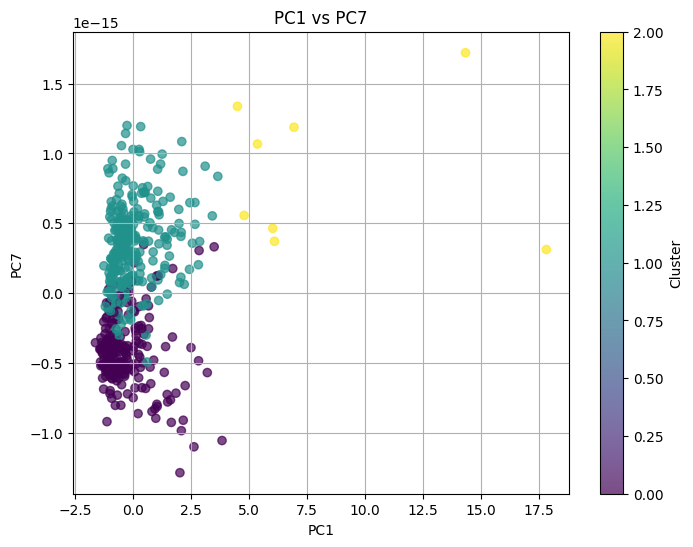

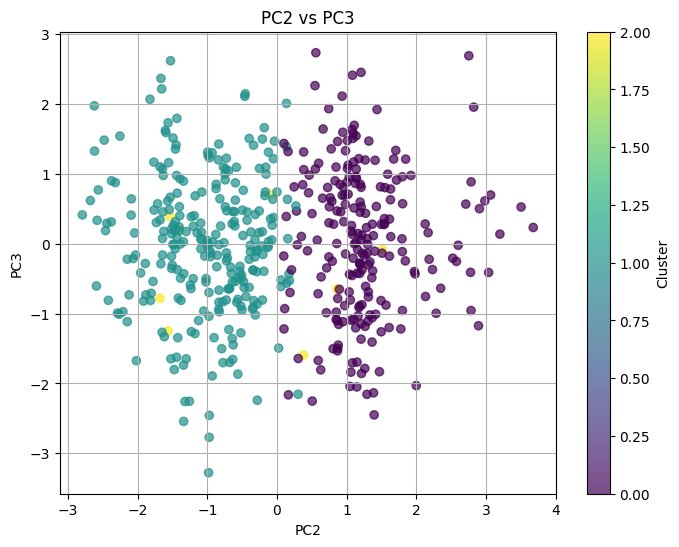

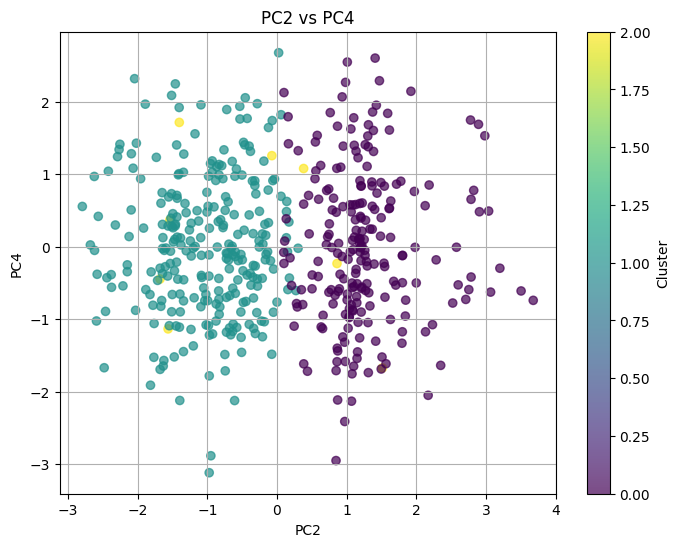

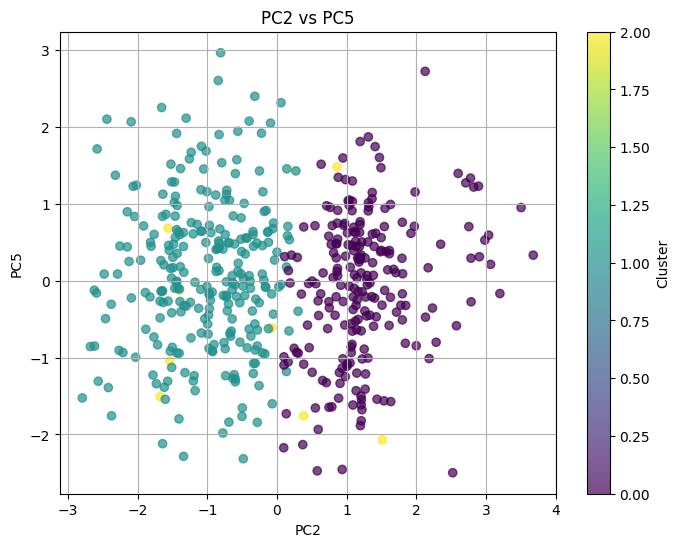

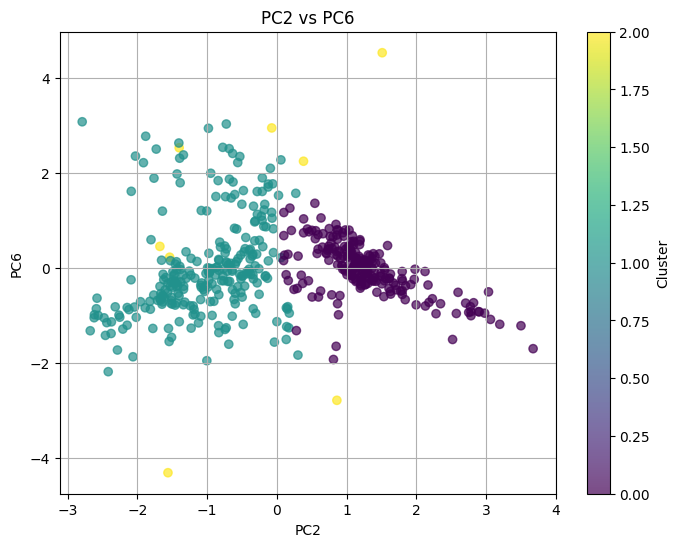

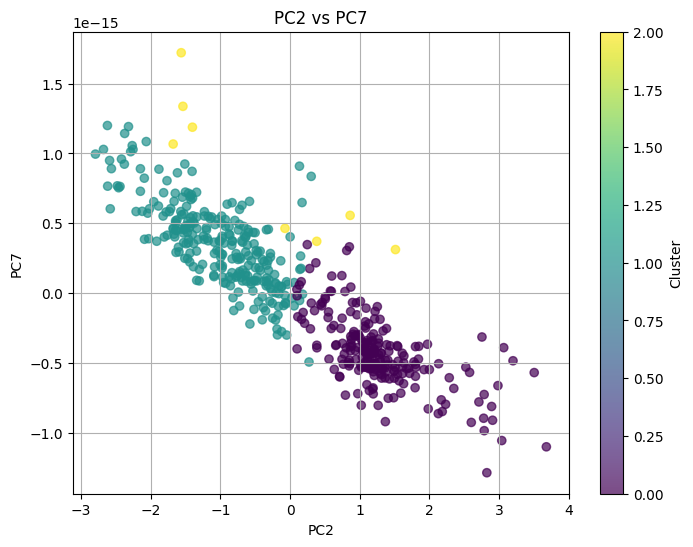

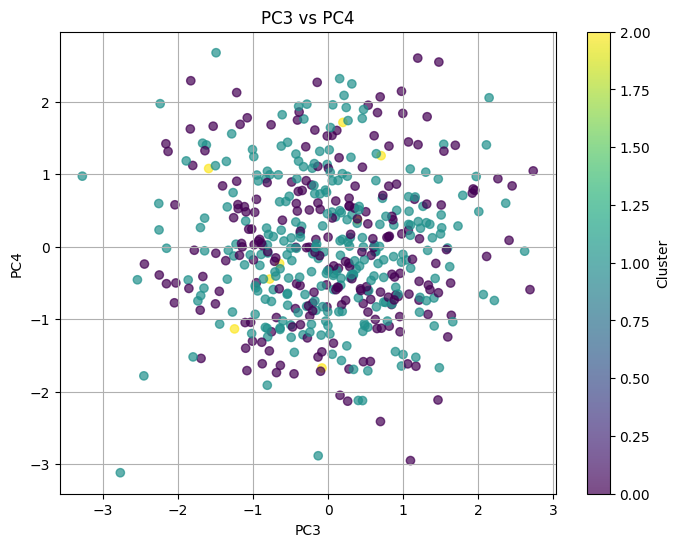

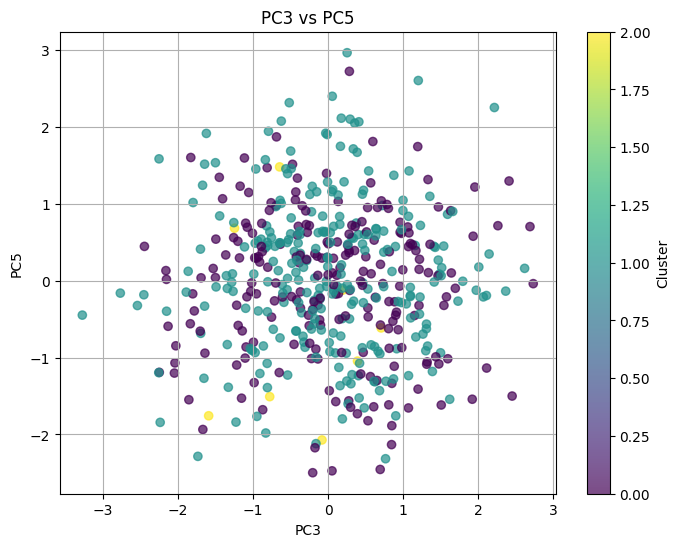

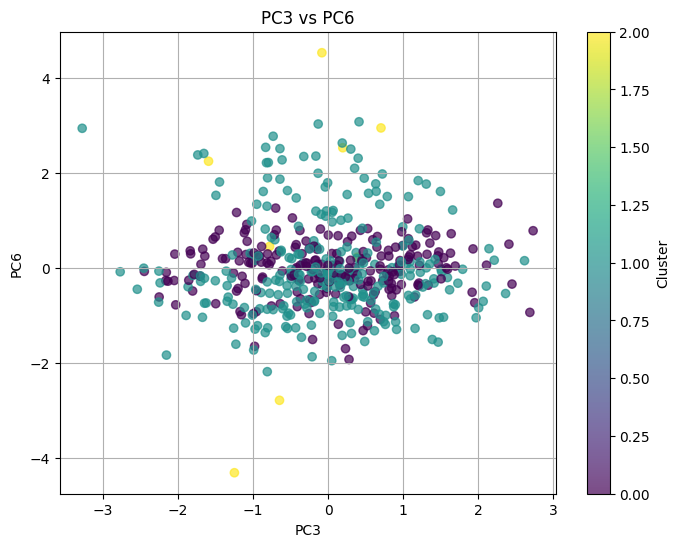

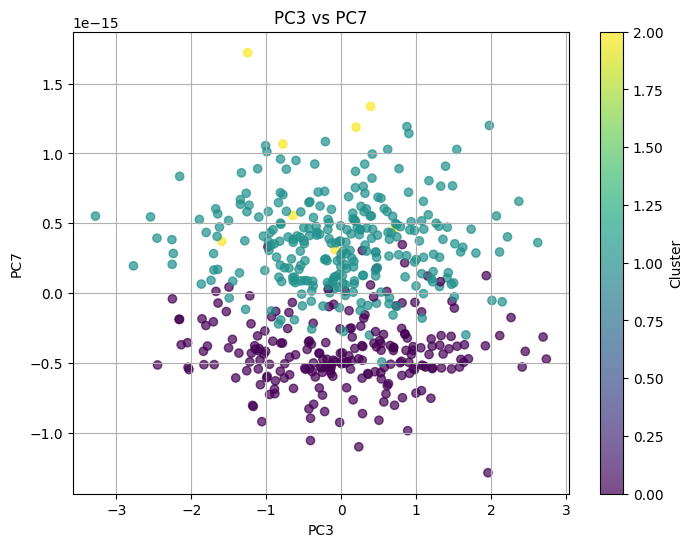

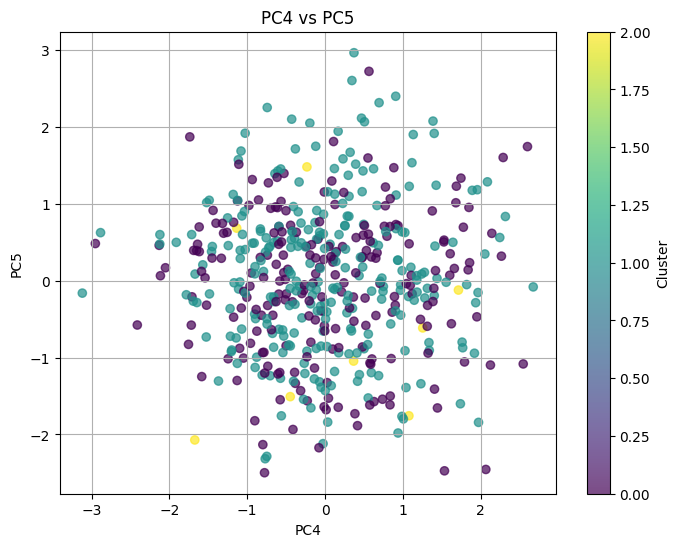

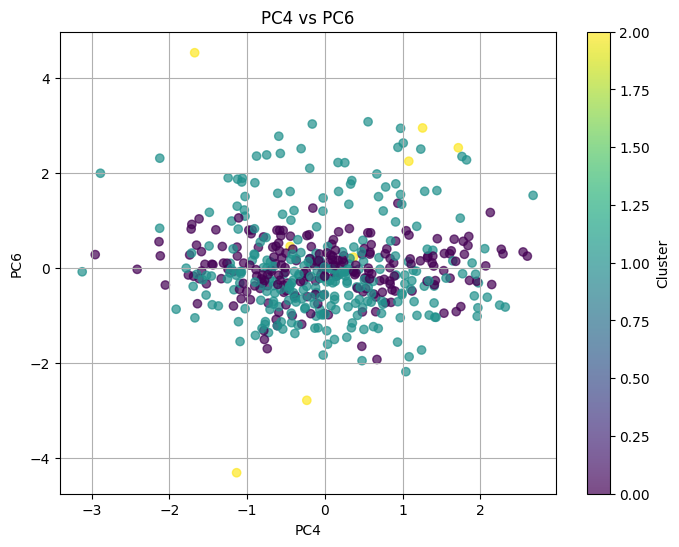

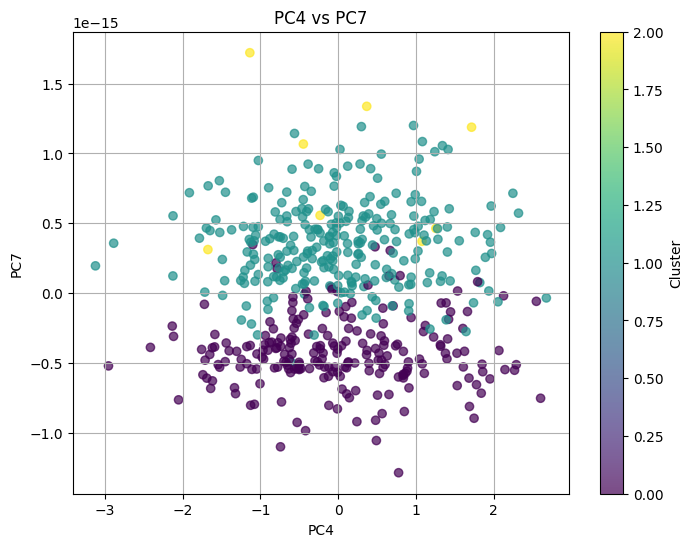

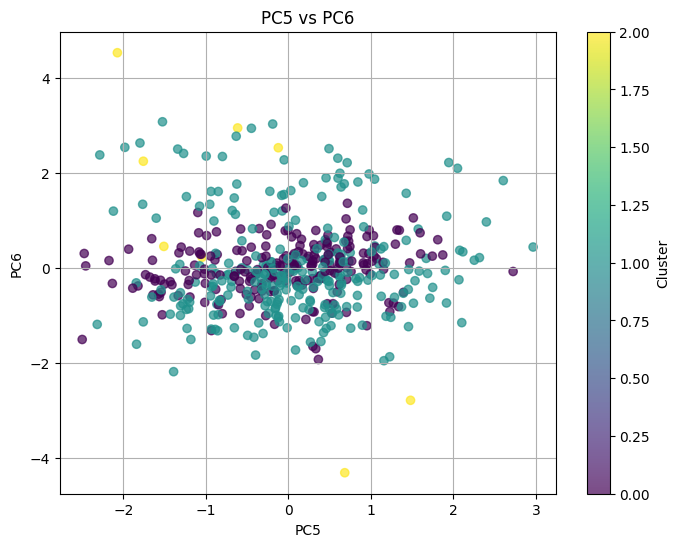

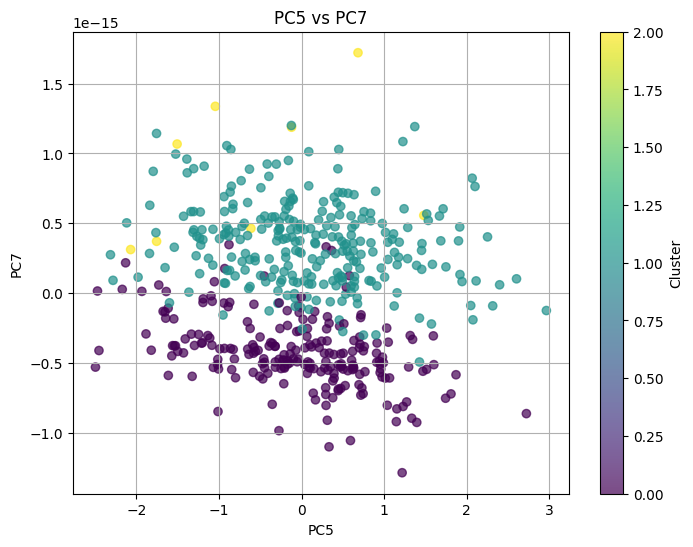

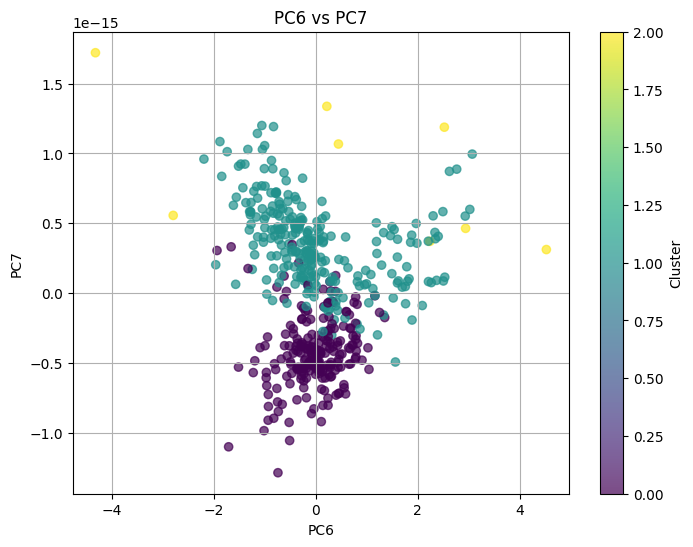

In [14]:
 # helper function to compare and visualize PC-variables

def plot_pca_pairs(pca_result, components):
    num_c = pca_result.shape[1]

    # process each pair of PC-variables
    for i in range(num_c):
        for j in range(i + 1, num_c):
            plt.figure(figsize=(8, 6))
            plt.scatter(pca_result[:, i], pca_result[:, j], alpha=0.7)
            plt.title(f"PC{i+1} vs PC{j+1}")
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plt.grid(True)
            plt.show()


def plot_pca_pairs_with_clustering(pca_result, components, n_clusters=3):
    num_c = pca_result.shape[1]
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)
    
    # Process each pair of PC-variables and plot clusters
    for i in range(num_c):
        for j in range(i + 1, num_c):
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(pca_result[:, i], pca_result[:, j], c=cluster_labels, cmap='viridis', alpha=0.7)
            plt.title(f"PC{i+1} vs PC{j+1}")
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plt.grid(True)
            plt.colorbar(scatter, label='Cluster')
            plt.show()



# plot_pca_pairs(X_pca, pca.components_)
# Starting with 3 however, it would be nice to try using other numbers 
# such as 6for the clusters based on the target variable
plot_pca_pairs_with_clustering(X_pca, pca.components_, n_clusters=3)





<h4>I think PC2, PC3, PC4 and PC5 are really the most well components as there is less or absolutely no overlapping compare to the other PCs. And there is noise in PC1, PC6 and PC7</h4>